In [1]:
import plotly.graph_objects as go 
from scipy import stats 
import numpy as np 

## Урок 5. Применение математической статистики для проверки гипотез в реальной жизни для популярных метрик

### Задача 1  
**Вы провели эксперимент c упрощением формы заказа в магазине Утконос и получили результаты по метрике конверсий в покупку.  
Выберите метод оценки и оцените есть ли стат.значимые различия между конверсиями в двух группах при alpha = 5%.  
Дайте краткие рекомендации команде.  
Результаты:   
1)Число юзеров в группах , которые заходили на сайт в период эксперимента: n1 = 15550 и n2 = 15550.  
2)Число юзеров в группах , которые совершили хотя бы одну покупку за период эксперимента: n1 = 164 и n2 = 228  
3)Конверсии : conv1 = 1.05% conv2 = 1.47% .**

Ссылка на результат в калькуляторе **AB Testguide**: https://abtestguide.com/calc/?ua=15550&ub=15550&ca=164&cb=228

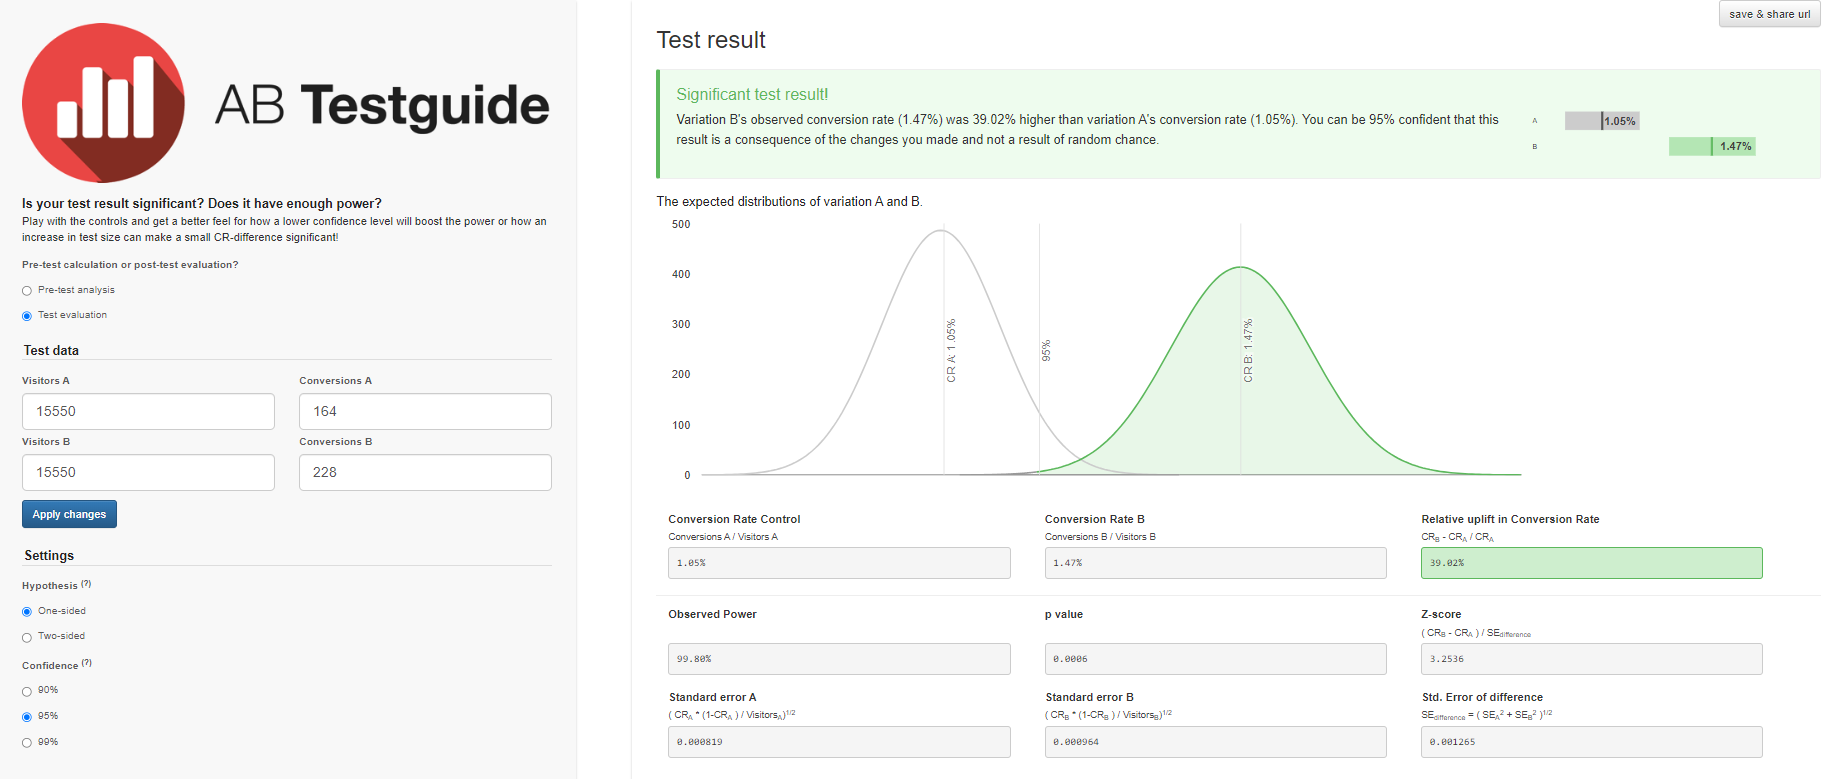

**Резултат теста:**  
Наблюдаем статистически значимые различия между конверсиями  
P_value = 0.0011 < alpha = 5% = 0.005

**Рекомендации:**  
Отвергаем n1 (нулевую гипотезу) принимаем и внедряем альтернативную n2

Наблюдаемый коэффициент конверсии варианта B ( 1,47% ) был на 39,02% выше , чем коэффициент конверсии варианта A ( 1,05% ).
Мы можем быть 95 % уверены, что этот результат является следствием внесенных вами изменений, а не результатом случайности.

**Согласно калькулятору довирительный интервал при выборке n2=15550 и conv2=1.47 =0.19**  
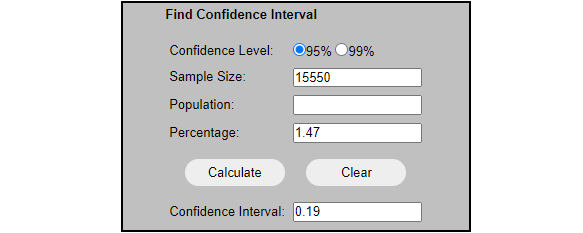

Между значениями [1,28; 1,66] Если 0 не входит в доверительный интервал, то значит, на основе собранных данных статистически значимая разница между группами обнаружена. **Принимаем альтернативную гипотезу**

In [2]:
sample_1_converted, sample_2_converted = 164, 228
sample_1_size, sample_2_size = 15500, 15500
prob_1 = sample_1_converted / sample_1_size
prob_2 = sample_2_converted / sample_2_size

In [3]:
bernoulli_1 = stats.bernoulli.rvs(prob_1, size=sample_1_size)
bernoulli_2 = stats.bernoulli.rvs(prob_2, size=sample_2_size)

In [4]:
se = np.sqrt((prob_1 * (1 - prob_1) / sample_1_size) + (prob_2 * (1 - prob_2) / sample_2_size))
z_score = (prob_1 - prob_2) / se
pvalue = stats.norm.sf(abs(z_score)) * 2

md = prob_1 - prob_2

print(f"Difference between samples: {md}, standart error: {se}, p_value: {pvalue}")

if pvalue < .05:
    print(f"Sample # {1 if md > 0 else 2} mean is greater")
else:
    print("No significant difference")

Difference between samples: -0.004129032258064515, standart error: 0.0012690356490794444, p_value: 0.0011392168150319737
Sample # 2 mean is greater


In [5]:
left = md - 1.96 * se
right = md + 1.96 * se

left, right

(-0.006616342130260227, -0.0016417223858688043)

**Доверительный интервал при выборке n2 = 15550 и conv2 = 1.47%**  
Между значениями: (-0.006616342130260227, -0.0016417223858688043) Если 0 не входит в доверительный интервал, то значит, на основе собранных данных статистически значимая разница между группами обнаружена.  
**Принимаем альтернативную гипотезу**

### Задача 2  
**Сравниваем метрику конверсия в покупку.  
Размер выборки - 10000 элементов в каждой группе.  
Какой статистический критерий тут лучше всего подойдёт и почему ?**

К метрике конверсия в покупку применим:  
Параметрический критерий – критерии значимости, потому что, делаем предположение о распределении конверсии, относящееся к выборке в 10000 элементов.  
(t-критерий),(t-тест).